# Project Title - Comcast customer complaint Analysis
## By Ifalore Simeon

#### Problem overview

`DESCRIPTION`

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

`Data Dictionary`

* Ticket #: Ticket number assigned to each complaint
* Customer Complaint: Description of complaint
* Date: Date of complaint
* Time: Time of complaint
* Received Via: Mode of communication of the complaint
* City: Customer city
* State: Customer state
* Zipcode: Customer zip
* Status: Status of complaint
* Filing on behalf of someone

`Analysis Task`

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. 
- Provide insights on:

    -  Which state has the maximum complaints`

    -  Which state has the highest percentage of unresolved complaints`
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from pandas import datetime as dt

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15940/2597268894.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


In [2]:
 # reading the complaint data
complaint_df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
#getting a sense of the data
complaint_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
complaint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
#converting date column to datetime datatype
complaint_df["Date"]=pd.to_datetime(complaint_df.Date, format='%d-%m-%y') 


In [6]:
complaint_df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,2015-09-06,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [7]:
complaint_df["Date"] 

0      2015-04-22
1      2015-08-04
2      2015-04-18
3      2015-07-05
4      2015-05-26
          ...    
2219   2015-02-04
2220   2015-02-06
2221   2015-09-06
2222   2015-06-23
2223   2015-06-24
Name: Date, Length: 2224, dtype: datetime64[ns]

In [8]:
complaint_df.loc[0, 'Date'].day_name()

'Wednesday'

In [9]:
# Dropping the "Date_month_year"column which is a string value which will be replace by the date_time value column "Date" created
complaint_df = complaint_df.drop("Date_month_year", axis=1)
complaint_df

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [10]:
complaint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Time                         2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 173.9+ KB


In [11]:
# Checking for missing or Null values
complaint_df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [12]:
#Lets extract month from date column
complaint_df['month'] = complaint_df.Date.dt.month

In [13]:
complaint_df['month'][:20]

0      4
1      8
2      4
3      7
4      5
5     12
6      6
7      6
8      1
9      6
10     4
11     6
12     6
13     6
14     6
15     6
16     6
17     4
18    11
19     2
Name: month, dtype: int64

In [14]:
complaint_df['month'] = complaint_df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])

In [15]:
complaint_df['month'].head()

0    April
1      Aug
2    April
3     July
4      May
Name: month, dtype: object

#### Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Visualizing the data at day and month granualrity

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12

### Trend chart at daily granularity

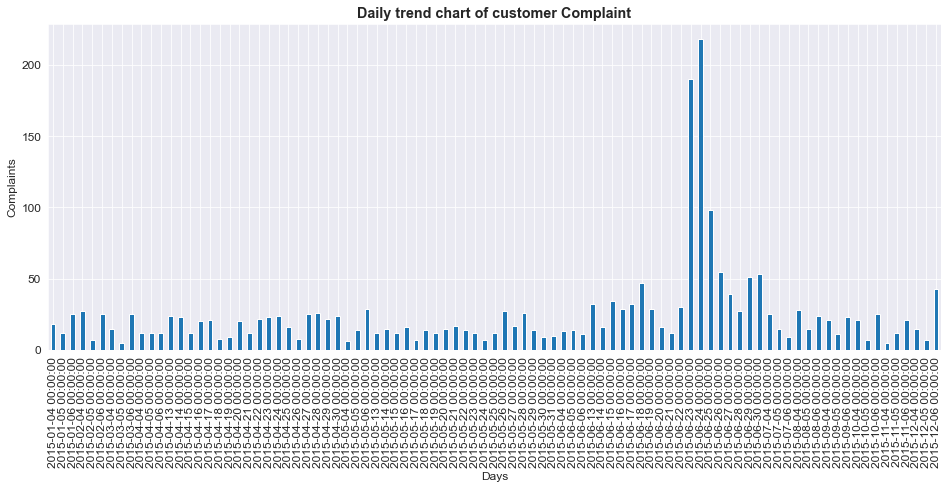

In [17]:
complaint_df['Customer Complaint'].groupby(complaint_df['Date']).count().plot(kind='bar',figsize=(16,6))
plt.title("Daily trend chart of customer Complaint",fontweight='bold')
plt.xlabel("Days")
plt.ylabel("Complaints");

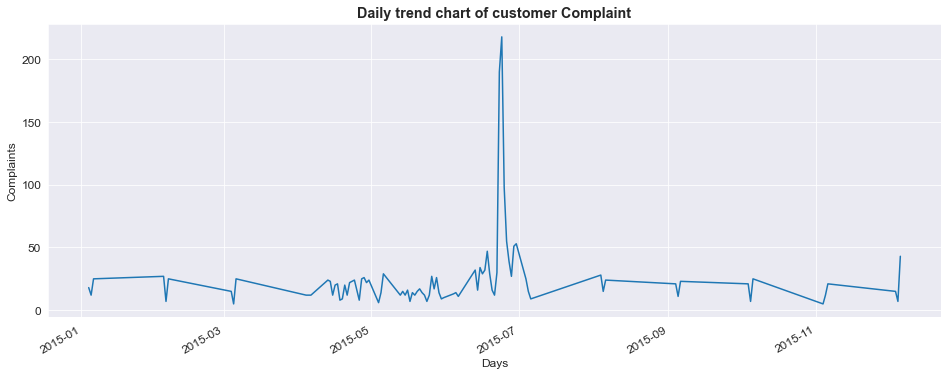

In [18]:
complaint_df['Customer Complaint'].groupby(complaint_df['Date']).count().plot(kind='line',figsize=(16,6))
plt.title("Daily trend chart of customer Complaint",fontweight='bold')
plt.xlabel("Days")
plt.ylabel("Complaints");

### Trend chart at monthly granularity

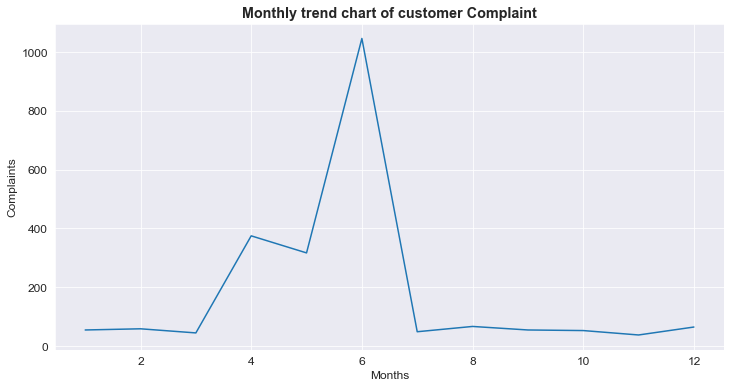

In [19]:
complaint_df['Customer Complaint'].groupby(complaint_df.Date.dt.month).count().plot(kind='line',figsize=(12,6))
plt.title("Monthly trend chart of customer Complaint",fontweight='bold')
plt.xlabel("Months")
plt.ylabel("Complaints");

#### Table with the frequency of complaint types.

In [20]:
from collections import Counter
c_count = Counter(complaint_df['Customer Complaint'])
d=c_count.most_common(30)
d=pd.DataFrame(d,columns=['type','count'])
d

,type,count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
5,Comcast Data Caps,11
6,Comcast Billing,11
7,Unfair Billing Practices,9
8,Internet speed,8
9,Comcast data caps,8


### Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
converted all complaints to lower case to help optimize the search for keywords

In [21]:
complaint_df['Customer Complaint']= complaint_df['Customer Complaint'].str.lower()
complaint_df.head(30)

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,comcast cable internet speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug
2,242732,speed and service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July
4,307175,comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May
5,338519,isp charging for arbitrary data limits with ov...,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,Dec
6,361148,throttling service and unreasonable data caps,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,June
7,359792,comcast refuses to help troubleshoot and corre...,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,June
8,318072,comcast extended outages,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,Jan
9,371214,comcast raising prices and not being available...,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,June


In [22]:
internet_issues1 = complaint_df[complaint_df['Customer Complaint'].str.contains("internet")].count()
internet_issues2 = complaint_df[complaint_df['Customer Complaint'].str.contains("data")].count()
internet_issues3 = complaint_df[complaint_df['Customer Complaint'].str.contains("data")].count()

billing_issue1 = complaint_df[complaint_df['Customer Complaint'].str.contains('charge')].count()
billing_issue2 = complaint_df[complaint_df['Customer Complaint'].str.contains('bill')].count()
billing_issue3 = complaint_df[complaint_df['Customer Complaint'].str.contains('price')].count()

service_issue1 = complaint_df[complaint_df['Customer Complaint'].str.contains('service')].count()
service_issue2 = complaint_df[complaint_df['Customer Complaint'].str.contains('customer')].count()


internet_issue = internet_issues1 + internet_issues2 + internet_issues3 
billing_issue = billing_issue1 + billing_issue2 + billing_issue3 
service_issue = service_issue1 + service_issue2 

In [23]:
internet_issue

Ticket #                       970
Customer Complaint             970
Date                           970
Time                           970
Received Via                   970
City                           970
State                          970
Zip code                       970
Status                         970
Filing on Behalf of Someone    970
month                          970
dtype: int64

In [24]:
billing_issue

Ticket #                       577
Customer Complaint             577
Date                           577
Time                           577
Received Via                   577
City                           577
State                          577
Zip code                       577
Status                         577
Filing on Behalf of Someone    577
month                          577
dtype: int64

In [25]:
service_issue

Ticket #                       584
Customer Complaint             584
Date                           584
Time                           584
Received Via                   584
City                           584
State                          584
Zip code                       584
Status                         584
Filing on Behalf of Someone    584
month                          584
dtype: int64

In [26]:
other_issues = 2224 - (service_issue + billing_issue + internet_issue)
other_issues

Ticket #                       93
Customer Complaint             93
Date                           93
Time                           93
Received Via                   93
City                           93
State                          93
Zip code                       93
Status                         93
Filing on Behalf of Someone    93
month                          93
dtype: int64

#### Q2: Which state has max complaints

In [27]:
statewise_df=complaint_df[['Ticket #', 'State']].groupby('State').count().sort_values(by='Ticket #',ascending=False)
statewise_df.head(10)

,Ticket #
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


 **Georgia** state has received maximum customer complaints we have to give special attention to that state Georgia,Florida and california are three states from where maximum complaints were received

### statewise complaint resolving rate

In [28]:
complaint_df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [29]:
complaint_df['New status']=complaint_df['Status'].apply(lambda x: 'Closed' if (x =='Solved'or x== 'Closed') else 'Open')

In [30]:
complaint_df = complaint_df.drop('Status',axis=1)
complaint_df

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Filing on Behalf of Someone,month,New status
0,250635,comcast cable internet speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,No,April,Closed
1,223441,payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,No,Aug,Closed
2,242732,speed and service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Yes,April,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Yes,July,Open
4,307175,comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,No,May,Closed
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,service availability,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,No,Feb,Closed
2220,318775,comcast monthly billing for returned modem,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,No,Feb,Closed
2221,331188,complaint about comcast,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,No,Sep,Closed
2222,360489,extremely unsatisfied comcast customer,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,No,June,Closed


In [31]:
Statewise_solving_rate=complaint_df.groupby(['State','New status'])['New status'].count().unstack().fillna(0).sort_values(by='Open',ascending= False)
Statewise_solving_rate=pd.DataFrame(Statewise_solving_rate)
Statewise_solving_rate

New status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


In [32]:
Statewise_solving_rate['unresolved complaint percent']=(Statewise_solving_rate['Open']/Statewise_solving_rate['Open'].sum())*100

In [33]:
Statewise_solving_rate.sort_values(by='unresolved complaint percent', ascending = False)

New status,Closed,Open,unresolved complaint percent
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


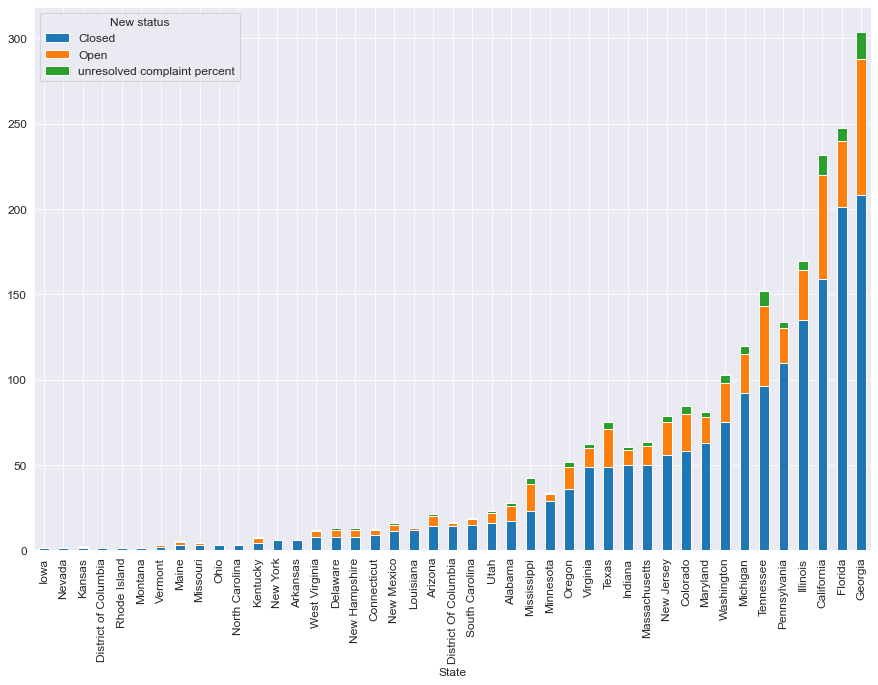

In [34]:
Statewise_solving_rate.sort_values('Closed',axis = 0,ascending=True).plot(kind='bar',stacked=True,figsize=(15,10));

#### % of complaints resolved till date

In [35]:
resolved_compl=complaint_df.groupby(['Received Via','New status']).size().unstack()
resolved_compl['resolved_perc'] = (resolved_compl['Closed']/resolved_compl['Closed'].sum())*100
resolved_compl['resolved_perc']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved_perc, dtype: float64

### Inferences and Conclusion
We can see that the resolved rate for Customer call is **50.6%** while that of the Internet is about **49.4%** 

To improve this we have to look out the state of Georgia,Florida and california from where maximum complaints received and the month of June as maximum complaints received in this month. We should look out the reason behind this.